## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle
pd.set_option("display.max_columns",None)

## Data Loading

In [3]:
os.listdir("input")

['Adolescent.csv', 'Adult.csv', 'Child.csv', 'Toddler.csv']

In [4]:
df=pd.read_csv(filepath_or_buffer="input/Child.csv")

In [5]:
df.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,0,6,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,0,6,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,0,6,m,?,no,no,Jordan,yes,5,4-11 years,?,NO
3,4,0,1,0,0,1,1,0,0,0,1,5,f,?,yes,no,Jordan,no,4,4-11 years,?,NO
4,5,1,1,1,1,1,1,1,1,1,1,5,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [6]:
print(df.shape)

(292, 22)


## Data Preprocessing

In [7]:
print(df.columns)

Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')


***dropping unwanted columns***

In [8]:
df=df.drop(labels=["id","ethnicity","contry_of_res","used_app_before","austim","age_desc"],axis=1)

In [9]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,result,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,6,m,no,5,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,6,m,no,5,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,6,m,no,5,?,NO
3,0,1,0,0,1,1,0,0,0,1,5,f,yes,4,?,NO
4,1,1,1,1,1,1,1,1,1,1,5,m,yes,10,Parent,YES


***renaming the columns***

In [10]:
df=df.rename(columns={"Class/ASD":"Class"})

In [11]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,result,relation,Class
0,1,1,0,0,1,1,0,1,0,0,6,m,no,5,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,6,m,no,5,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,6,m,no,5,?,NO
3,0,1,0,0,1,1,0,0,0,1,5,f,yes,4,?,NO
4,1,1,1,1,1,1,1,1,1,1,5,m,yes,10,Parent,YES


***Visualizing Age Column***

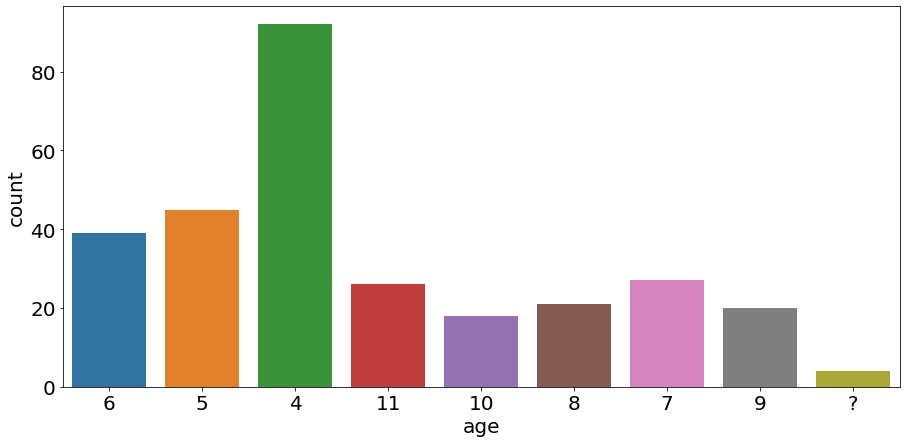

In [12]:
plt.figure(figsize=(15,7))
plt.rcParams["font.size"]=20
sns.countplot(x="age",data=df)
plt.show()

***Visualizing gender Column***

In [13]:
df["gender"].value_counts()

m    208
f     84
Name: gender, dtype: int64

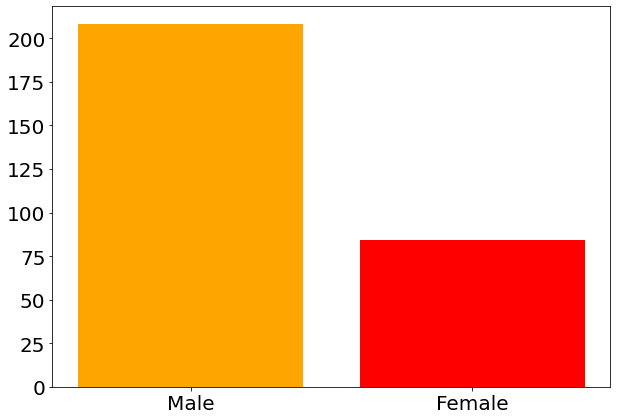

In [14]:
plt.figure(figsize=(10,7))
plt.rcParams["font.size"]=20
plt.bar(x=["Male","Female"],height=df["gender"].value_counts(),color=["orange","red"])
plt.show()

In [15]:
df["gender"].replace(to_replace=["m","f"],value=[0,1],inplace=True)

In [16]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,result,relation,Class
0,1,1,0,0,1,1,0,1,0,0,6,0,no,5,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,6,0,no,5,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,6,0,no,5,?,NO
3,0,1,0,0,1,1,0,0,0,1,5,1,yes,4,?,NO
4,1,1,1,1,1,1,1,1,1,1,5,0,yes,10,Parent,YES


***Visualizing jundice***

In [17]:
df["jundice"].unique()

array(['no', 'yes'], dtype=object)

In [18]:
df["jundice"].value_counts()

no     212
yes     80
Name: jundice, dtype: int64

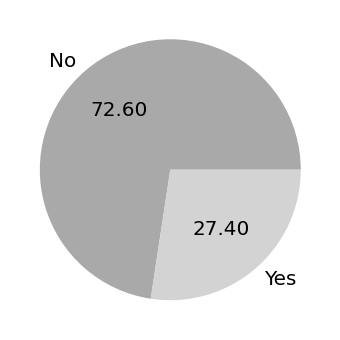

In [19]:
plt.figure(figsize=(10,6))
plt.rcParams["font.size"]=20
plt.pie(x=df["jundice"].value_counts(),labels=["No","Yes"],colors=["darkgray","lightgray"],autopct="%.2f")
plt.show()

In [20]:
df["jundice"].replace(to_replace=["no","yes"],value=[0,1],inplace=True)

In [21]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,result,relation,Class
0,1,1,0,0,1,1,0,1,0,0,6,0,0,5,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,6,0,0,5,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,6,0,0,5,?,NO
3,0,1,0,0,1,1,0,0,0,1,5,1,1,4,?,NO
4,1,1,1,1,1,1,1,1,1,1,5,0,1,10,Parent,YES


***Visualizing result column***

In [22]:
pos_result=df[df["result"]>=5]
neg_result=df[df["result"]<5]

In [23]:
print("positive results count is {}".format(len(pos_result)))
print("negative results count is {}".format(len(neg_result)))

positive results count is 222
negative results count is 70


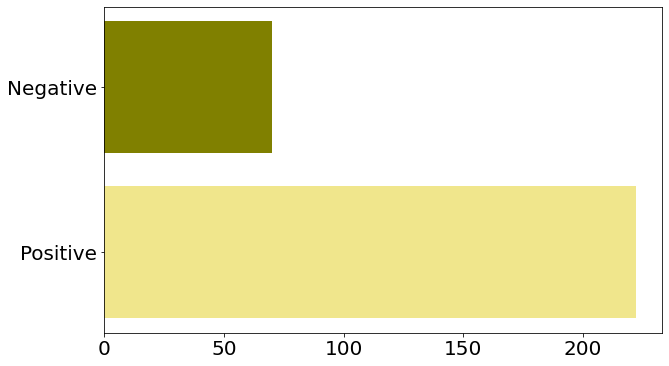

In [24]:
plt.figure(figsize=(10,6))
plt.rcParams["font.size"]=20
plt.barh(y=["Positive","Negative"],width=[len(pos_result),len(neg_result)],color=["khaki","olive"])
plt.show()

***visualizing Who completed the test column***

In [25]:
df["relation"].unique()

array(['Parent', '?', 'Self', 'Relative', 'Health care professional',
       'self'], dtype=object)

In [26]:
df["relation"].value_counts()

Parent                      214
?                            43
Relative                     17
Health care professional     13
Self                          4
self                          1
Name: relation, dtype: int64

In [27]:
df["relation"].replace(to_replace=["?","self"],value=["Parent","Self"],inplace=True)

In [28]:
df["relation"].value_counts()

Parent                      257
Relative                     17
Health care professional     13
Self                          5
Name: relation, dtype: int64

In [29]:
df["relation"].replace(to_replace=["Parent","Relative","Health care professional","Self"],value=[0,1,2,3],inplace=True)

In [30]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,result,relation,Class
0,1,1,0,0,1,1,0,1,0,0,6,0,0,5,0,NO
1,1,1,0,0,1,1,0,1,0,0,6,0,0,5,0,NO
2,1,1,0,0,0,1,1,1,0,0,6,0,0,5,0,NO
3,0,1,0,0,1,1,0,0,0,1,5,1,1,4,0,NO
4,1,1,1,1,1,1,1,1,1,1,5,0,1,10,0,YES


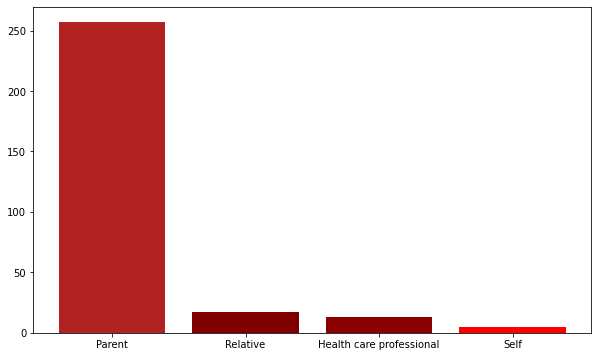

In [31]:
plt.figure(figsize=(10,6))
plt.rcParams["font.size"]=10
plt.bar(x=["Parent","Relative","Health care professional","Self"],height=df["relation"].value_counts(),color=["firebrick","maroon","darkred","red"])
plt.show()

***Analyzing and Visualizing Class column***

In [32]:
df["Class"].unique()

array(['NO', 'YES'], dtype=object)

In [33]:
df["Class"].value_counts()

NO     151
YES    141
Name: Class, dtype: int64

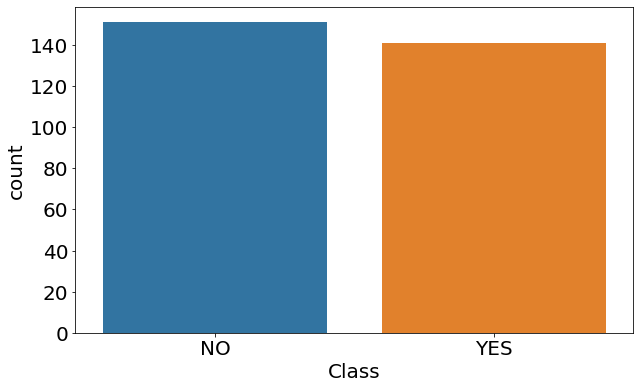

In [34]:
plt.figure(figsize=(10,6))
plt.rcParams["font.size"]=20
sns.countplot(x="Class",data=df)
plt.show()

In [35]:
df["Class"].replace(to_replace=["NO","YES"],value=[0,1],inplace=True)

In [36]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,result,relation,Class
0,1,1,0,0,1,1,0,1,0,0,6,0,0,5,0,0
1,1,1,0,0,1,1,0,1,0,0,6,0,0,5,0,0
2,1,1,0,0,0,1,1,1,0,0,6,0,0,5,0,0
3,0,1,0,0,1,1,0,0,0,1,5,1,1,4,0,0
4,1,1,1,1,1,1,1,1,1,1,5,0,1,10,0,1


In [37]:
df.to_csv("Usefull_Data/usefull_Child.csv",index=False)

In [38]:
df.isnull().sum()

A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
age          0
gender       0
jundice      0
result       0
relation     0
Class        0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   A1_Score   292 non-null    int64 
 1   A2_Score   292 non-null    int64 
 2   A3_Score   292 non-null    int64 
 3   A4_Score   292 non-null    int64 
 4   A5_Score   292 non-null    int64 
 5   A6_Score   292 non-null    int64 
 6   A7_Score   292 non-null    int64 
 7   A8_Score   292 non-null    int64 
 8   A9_Score   292 non-null    int64 
 9   A10_Score  292 non-null    int64 
 10  age        292 non-null    object
 11  gender     292 non-null    int64 
 12  jundice    292 non-null    int64 
 13  result     292 non-null    int64 
 14  relation   292 non-null    int64 
 15  Class      292 non-null    int64 
dtypes: int64(15), object(1)
memory usage: 36.6+ KB


In [40]:
df["age"].unique()

array(['6', '5', '4', '11', '10', '8', '7', '9', '?'], dtype=object)

In [41]:
df["age"].replace(to_replace="?",value="11",inplace=True)

In [42]:
df["age"].unique()

array(['6', '5', '4', '11', '10', '8', '7', '9'], dtype=object)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   A1_Score   292 non-null    int64 
 1   A2_Score   292 non-null    int64 
 2   A3_Score   292 non-null    int64 
 3   A4_Score   292 non-null    int64 
 4   A5_Score   292 non-null    int64 
 5   A6_Score   292 non-null    int64 
 6   A7_Score   292 non-null    int64 
 7   A8_Score   292 non-null    int64 
 8   A9_Score   292 non-null    int64 
 9   A10_Score  292 non-null    int64 
 10  age        292 non-null    object
 11  gender     292 non-null    int64 
 12  jundice    292 non-null    int64 
 13  result     292 non-null    int64 
 14  relation   292 non-null    int64 
 15  Class      292 non-null    int64 
dtypes: int64(15), object(1)
memory usage: 36.6+ KB


In [44]:
df["age"]=df["age"].astype(dtype="int64")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   A1_Score   292 non-null    int64
 1   A2_Score   292 non-null    int64
 2   A3_Score   292 non-null    int64
 3   A4_Score   292 non-null    int64
 4   A5_Score   292 non-null    int64
 5   A6_Score   292 non-null    int64
 6   A7_Score   292 non-null    int64
 7   A8_Score   292 non-null    int64
 8   A9_Score   292 non-null    int64
 9   A10_Score  292 non-null    int64
 10  age        292 non-null    int64
 11  gender     292 non-null    int64
 12  jundice    292 non-null    int64
 13  result     292 non-null    int64
 14  relation   292 non-null    int64
 15  Class      292 non-null    int64
dtypes: int64(16)
memory usage: 36.6 KB


In [46]:
X=df.drop(labels="Class",axis=1)
y=df["Class"]

In [47]:
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,result,relation
0,1,1,0,0,1,1,0,1,0,0,6,0,0,5,0
1,1,1,0,0,1,1,0,1,0,0,6,0,0,5,0
2,1,1,0,0,0,1,1,1,0,0,6,0,0,5,0
3,0,1,0,0,1,1,0,0,0,1,5,1,1,4,0
4,1,1,1,1,1,1,1,1,1,1,5,0,1,10,0


In [48]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Class, dtype: int64

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(233, 15) (59, 15) (233,) (59,)


## Model-1 Support Vector Classifier

In [51]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train,y_train)

SVC()

In [52]:
svc_pred=svc_model.predict(X_test)

In [53]:
print(svc_pred)

[0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1]


## Result Analysis

***Accuracy Score***

In [54]:
svc_accuracy=accuracy_score(y_true=y_test,y_pred=svc_pred)
print("SupportVectorClassifier Accuracy is {:.2f}".format(svc_accuracy*100))

SupportVectorClassifier Accuracy is 96.61


***Classification Report***

In [55]:
print(classification_report(y_true=y_test,y_pred=svc_pred,target_names=["No","Yes"]))

              precision    recall  f1-score   support

          No       1.00      0.95      0.97        39
         Yes       0.91      1.00      0.95        20

    accuracy                           0.97        59
   macro avg       0.95      0.97      0.96        59
weighted avg       0.97      0.97      0.97        59



***Confusion Matrix***

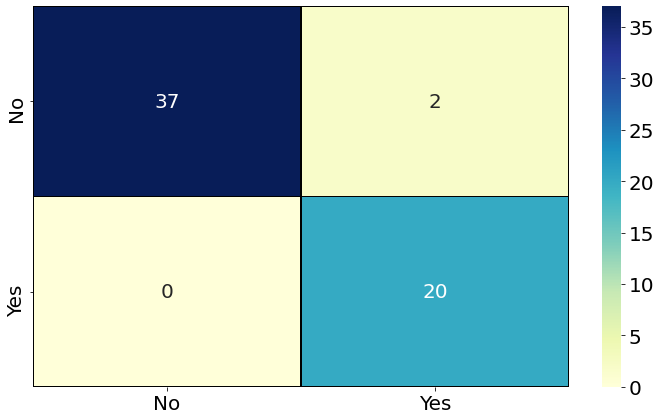

In [56]:
plt.figure(figsize=(12,7))
plt.rcParams["font.size"]=20
labels=["No","Yes"]
sns.heatmap(data=confusion_matrix(y_true=y_test,y_pred=svc_pred),annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap="YlGnBu",linecolor="black",linewidths=0.2)
plt.show()

## Model Saving

In [57]:
with open(file="model/Child/SVM_model_Child.pkl",mode="wb") as file:
    pickle.dump(obj=svc_model,file=file)

## Model-2 RandomForestClassifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=600)
RF_model.fit(X=X_train,y=y_train)

RandomForestClassifier(n_estimators=600)

In [59]:
RF_pred=RF_model.predict(X=X_test)

In [60]:
print(RF_pred)

[0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1]


### Result Analysis

***Accuracy Score***

In [61]:
RF_accuracy=accuracy_score(y_true=y_test,y_pred=RF_pred)
print("RandomForestClassifier accuracy is {:.2f}".format(RF_accuracy*100))

RandomForestClassifier accuracy is 100.00


***Classification Report***

In [62]:
print(classification_report(y_true=y_test,y_pred=RF_pred,target_names=["No","Yes"]))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00        39
         Yes       1.00      1.00      1.00        20

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



***Confusion Matrix***

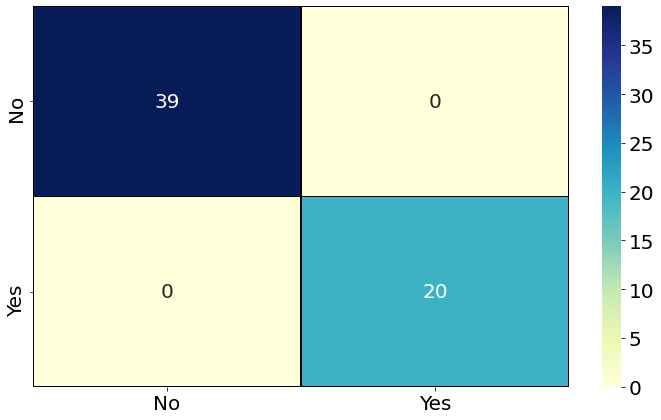

In [63]:
plt.figure(figsize=(12,7))
plt.rcParams["font.size"]=20
labels=["No","Yes"]
sns.heatmap(data=confusion_matrix(y_true=y_test,y_pred=RF_pred),annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap="YlGnBu",linecolor="black",linewidths=0.2)
plt.show()

In [64]:
with open(file="model/Child/RF_model_Child.pkl",mode="wb") as file:
    pickle.dump(obj=RF_model,file=file)

## Model-3 AdaBoostClassifier

In [65]:
from sklearn.ensemble import AdaBoostClassifier
ABC_model=AdaBoostClassifier(n_estimators=600)
ABC_model.fit(X=X_train,y=y_train)

AdaBoostClassifier(n_estimators=600)

In [66]:
ABC_pred=ABC_model.predict(X=X_test)

In [67]:
print(ABC_pred)

[0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1]


## Result Analysis

***Accuracy Score***

In [68]:
ABC_accuracy=accuracy_score(y_true=y_test,y_pred=ABC_pred)
print("AdaBoostClassifier accuracy is {:.2f}".format(ABC_accuracy*100))

AdaBoostClassifier accuracy is 100.00


***Classification Report***

In [69]:
print(classification_report(y_true=y_test,y_pred=ABC_pred,target_names=["No","Yes"]))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00        39
         Yes       1.00      1.00      1.00        20

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



***Confusion Matrix***

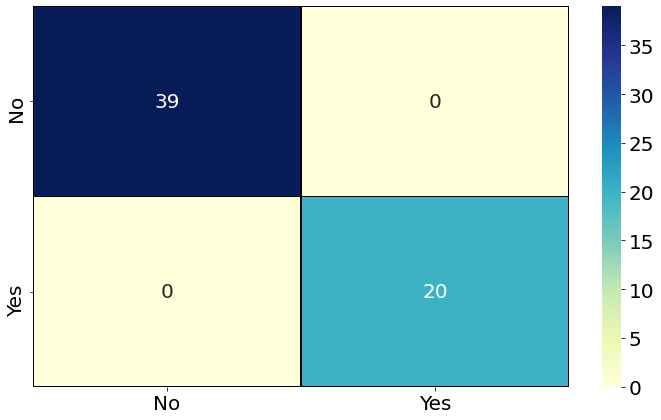

In [70]:
plt.figure(figsize=(12,7))
plt.rcParams["font.size"]=20
labels=["No","Yes"]
sns.heatmap(data=confusion_matrix(y_true=y_test,y_pred=ABC_pred),annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap="YlGnBu",linecolor="black",linewidths=0.2)
plt.show()

In [71]:
with open(file="model/Child/ABC_model_Child.pkl",mode="wb") as file:
    pickle.dump(obj=ABC_model,file=file)

## Model-4 ANN(Artificial Neural Network)

In [72]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import optimizers

In [73]:
hidden_units=100
hidden_layer_act='tanh'
output_layer_act='sigmoid'
no_epochs=10

In [74]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=15, activation=hidden_layer_act))
model.add(Dense(hidden_units, activation=hidden_layer_act))
model.add(Dense(1, activation=output_layer_act))

In [75]:
model.compile(loss='binary_crossentropy',optimizer="adam", metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1600      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11,801
Trainable params: 11,801
Non-trainable params: 0
_________________________________________________________________


In [77]:
history=model.fit(x=X_train,y=y_train,epochs=no_epochs, batch_size=32,validation_data=(X_test,y_test))

Epoch 1/10
8/8 [==============================] - 2s 82ms/step - loss: 0.7265 - accuracy: 0.4807 - val_loss: 0.6587 - val_accuracy: 0.5085
Epoch 2/10
8/8 [==============================] - 0s 14ms/step - loss: 0.4929 - accuracy: 0.7940 - val_loss: 0.4353 - val_accuracy: 0.7966
Epoch 3/10
8/8 [==============================] - 0s 21ms/step - loss: 0.4352 - accuracy: 0.7554 - val_loss: 0.4374 - val_accuracy: 0.8136
Epoch 4/10
8/8 [==============================] - 0s 14ms/step - loss: 0.3946 - accuracy: 0.8069 - val_loss: 0.3730 - val_accuracy: 0.8475
Epoch 5/10
8/8 [==============================] - 0s 21ms/step - loss: 0.3599 - accuracy: 0.8412 - val_loss: 0.3485 - val_accuracy: 0.8983
Epoch 6/10
8/8 [==============================] - 0s 14ms/step - loss: 0.3316 - accuracy: 0.8755 - val_loss: 0.3117 - val_accuracy: 0.8983
Epoch 7/10
8/8 [==============================] - 0s 16ms/step - loss: 0.3302 - accuracy: 0.8670 - val_loss: 0.3007 - val_accuracy: 0.8983
Epoch 8/10
8/8 [===========

## Model Accuracy and Loss Plot-Graphs

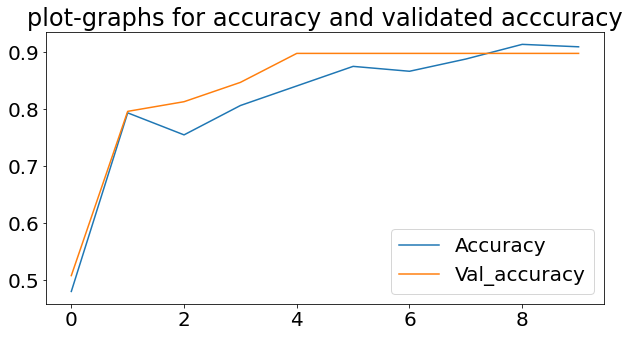

In [78]:
plt.figure(figsize=(10,5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title(label="plot-graphs for accuracy and validated acccuracy")
plt.legend(["Accuracy","Val_accuracy"])
plt.show()

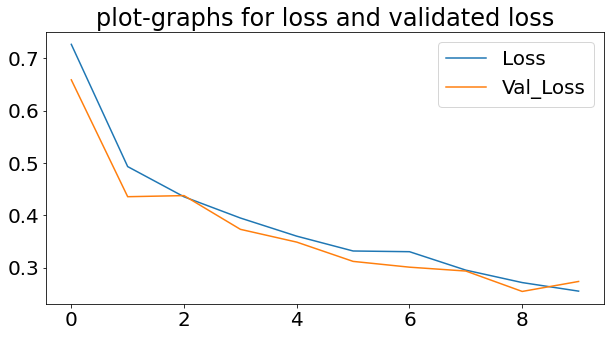

In [79]:
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title(label="plot-graphs for loss and validated loss")
plt.legend(["Loss","Val_Loss"])
plt.show()

## Model Saving

In [80]:
model.save("model/ANN_model_Child.h5")

In [81]:
ann_pred=model.predict(x=X_test,batch_size=10,verbose=1)

6/6 [==============================] - 0s 4ms/step


In [82]:
print(ann_pred)

[[0.6554382 ]
 [0.7421335 ]
 [0.10994124]
 [0.10242343]
 [0.893335  ]
 [0.8650613 ]
 [0.79252625]
 [0.8415927 ]
 [0.09680703]
 [0.94470716]
 [0.9033091 ]
 [0.27894834]
 [0.30137616]
 [0.02499822]
 [0.93793756]
 [0.05522266]
 [0.03196928]
 [0.35798216]
 [0.14505747]
 [0.18654105]
 [0.7537791 ]
 [0.16429272]
 [0.1290997 ]
 [0.77282614]
 [0.79743135]
 [0.07279858]
 [0.91172695]
 [0.02560413]
 [0.07833105]
 [0.14934683]
 [0.12735671]
 [0.0083102 ]
 [0.2152398 ]
 [0.6589092 ]
 [0.9172323 ]
 [0.11537245]
 [0.70961785]
 [0.9647704 ]
 [0.96539026]
 [0.8157309 ]
 [0.1894047 ]
 [0.11342975]
 [0.03375119]
 [0.69494164]
 [0.07885644]
 [0.93612623]
 [0.16231468]
 [0.7804768 ]
 [0.17433581]
 [0.12193346]
 [0.05266842]
 [0.36161178]
 [0.00533062]
 [0.93612623]
 [0.37118083]
 [0.95861065]
 [0.06828684]
 [0.7890198 ]
 [0.8766757 ]]


In [83]:
rounded = [int(round(x[0])) for x in ann_pred]
print(rounded)

[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1]


In [84]:
y_true=list(y_test)

In [85]:
print(y_true)

[0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1]


## Result Analysis

***Accuracy Score***

In [86]:
ann_accuracy=accuracy_score(y_true=y_true,y_pred=rounded)
print("ANN Accuracy is {:.2f}".format(ann_accuracy*100))

ANN Accuracy is 89.83


***Classification Report***

In [87]:
print(classification_report(y_true=y_true,y_pred=rounded,target_names=["No","Yes"]))

              precision    recall  f1-score   support

          No       1.00      0.85      0.92        39
         Yes       0.77      1.00      0.87        20

    accuracy                           0.90        59
   macro avg       0.88      0.92      0.89        59
weighted avg       0.92      0.90      0.90        59



***Confusion Matrix***

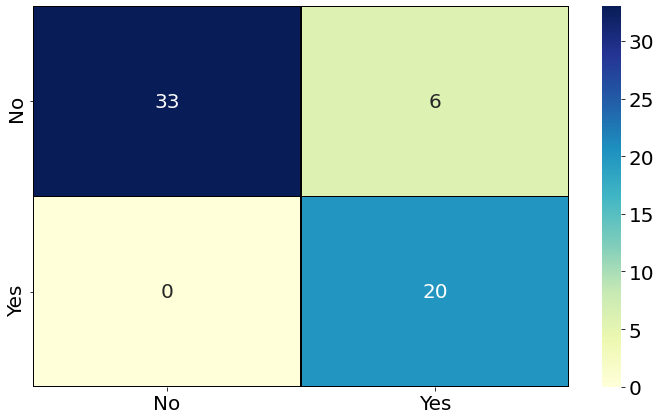

In [88]:
plt.figure(figsize=(12,7))
plt.rcParams["font.size"]=20
labels=["No","Yes"]
sns.heatmap(data=confusion_matrix(y_true=y_true,y_pred=rounded),annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap="YlGnBu",linecolor="black",linewidths=0.2)
plt.show()

## Accuracy Comparision for Child Dataset

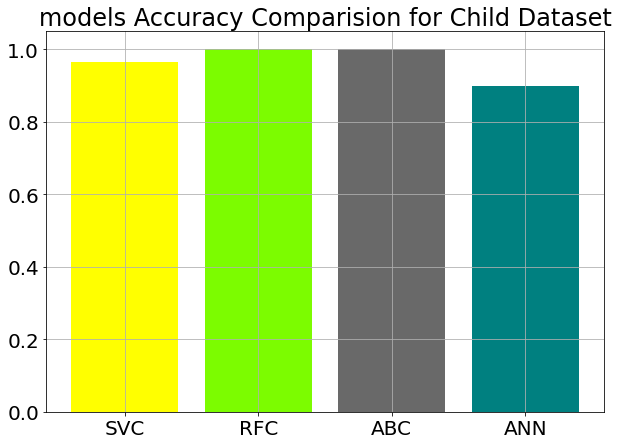

In [90]:
data=[svc_accuracy,RF_accuracy,ABC_accuracy,ann_accuracy]
labels=["SVC","RFC","ABC","ANN"]
colors=["yellow","lawngreen","dimgray","teal"]
plt.figure(figsize=(10,7))
plt.grid()
plt.bar(x=labels,height=data,color=colors)
plt.title(label="models Accuracy Comparision for Child Dataset")
plt.show()

## Thank You